In [ ]:
# 목표: 차원 축소에 대해 이해하고 대표적인 차원 축소 알고리즘 중 하나인
#       PCA (주성분 분석) 모델을 만들어 봅니다

# 핵심키워드 : 차원축소, 주성분분석, 설명된 분삭
# 핵심 패키지와 함수 : PCA

# 데이터셋 : fruits_300.npy

In [ ]:
# 300 x 100 x 100 ..
# 계속 증가하는 데이터 -> 저장공간의 부족.
# 데이터압축을 해도..  -> 군집이나 분류에 영향을 주지 않는 방법 없을까?

# 바로 '차원축소'!


# 차원과 차원축소
dimension reduction

In [ ]:
# 과일사진은 몇개의 '특성' 이 있나?  → 10000개의 픽셀 → 10000개의 '특성'이 있는 셈
# 머신러닝에서는 이러한 '특성'을 차원 (dimension) 이라고도 부른다.
# 따라서 '차원'을 줄일수 있다면 저장공간도 크게 절약할수 있을것이다.


In [ ]:
#  ※ 다차원배열(2차원, 3차원...)에서 다루어왔던 '차원' 은  축(axis) 를 말하는 거였다.
#     이번 '차원축소' 에서 여기서 말하는 차원은 2차원, 3차원 이런 차원이 아님


In [ ]:
# 차원축소
#  - 대표적인 비지도 학습중 하나
#  - 데이터를 가장 잘 나타내는 '일부 특성' 만 선택
#     -> 데이터 크기 줄이고,
#     -> overfit 억제효과

#  - 줄어든 차원에서 원본차원으로 '최소한의 손실'로 '복원'할수도 있다.
#  - 대표적인 차원축소 알고리즘 => '주성분 분석 (PCA: Principal Component Analysis)'


# 주성분 분석 (PCA) 소개


In [ ]:
#  PCA 는 데이터에 있는 '분산이 큰 방향' 을 찾는 거다.
#  '분산이 큰 방향' 이란 데이터를 '잘 표현하는 어떤 벡터'라고 볼수 있다.


- [교안]
![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbUvtbN%2FbtrowkIz2oH%2FpFi7dcwZI0DolbyEpKTHPk%2Fimg.png)

In [ ]:
# [주성분의 개수]
# '첫번째 주성분'을 찾은 다음
# 이 벡터에 수직이고 분산이 가장 큰 다음 방향을 찾습니다.
# 이 벡터가 '두 번째 주성분'.

# 데이터 준비

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
base_path = r'/content/drive/MyDrive/KoreaIT (코리아it)/250715 💚자연어처리S4/[자연어처리]/dataset(NLP2507)'

In [3]:
file_path = os.path.join(base_path, 'fruits_300.npy')

fruits = np.load(file_path)  # array 로 로딩

fruits.shape

(300, 100, 100)

In [4]:
fruits_2d = fruits.reshape(-1, 100*100)

fruits_2d.shape

(300, 10000)

# PCA

In [5]:
# 사이킥럿에서 제공하는 주성분 분석 알고리즘
from sklearn.decomposition import PCA

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

```python
class sklearn.decomposition.PCA(
  n_components=None, # 주성분의 개수, 혹은 설명된 분산의 비율
  *,
  copy=True,
  whiten=False,
  svd_solver='auto',
  tol=0.0,
  iterated_power='auto',
  n_oversamples=10,
  power_iteration_normalizer='auto',
  random_state=None)
```

In [6]:
# PCA 클래스의 객체를 만들 때 n_components 매개변수에 주성분의 개수를 지정해야 한다.

pca = PCA(n_components=50)  # 주성분의 개수
pca.fit(fruits_2d)


PCA(n_components=50)

## components_ 속성
fit() 한뒤에, PCA 클래스가 찾은 주성분이 저장되어 있다

In [8]:
# fit() 한 뒤,  PCA 클래스가 찾은 주성분은 components_ 속성에 저장되어 있다.  (Array)
# ↓ components_ 배열의 크기 확인.

pca.components_.shape


(50, 10000)

In [ ]:
# 원본데이터와 차원이 같으므로 주성분을 100 x 100 이미지 처럼 출력해볼수 있습니다.

# 일전에 만들었던 draw_fruits()  함수를 사용해 출력해봅시다

In [9]:
def draw_fruits(arr, ratio=1):
    n = len(arr)
    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

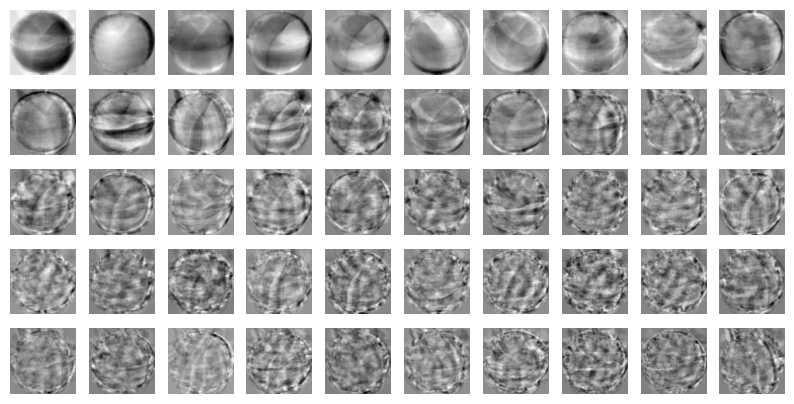

In [10]:
draw_fruits(pca.components_.reshape(-1, 100, 100))


## transform() 주성분으로 분해
원본데이터를 주성분에 투영하여 → 특성의 개수를 줄일수 있다

In [ ]:
# 50개의 주성분을 찾았다!
# 그러면, 원본데이터를 주성분에 투영하여 -> 특성의 개수를 10000개에서 50개로 줄일수 있다.
# 마치 원본데이터를 각 주성분으로 '분해(decomposition)'하는 것으로 생각해 볼수 있다.

# PCA 의 transform() 사용


In [12]:
print(fruits_2d.shape)   # (300, 10000)

fruits_pca = pca.transform(fruits_2d)

print(fruits_pca.shape)  # (300, 50)


(300, 10000)
(300, 50)


In [ ]:
# fruits_2d 는 (300, 10000) 크기의 배열이었다. 10000개의 픽셀(특성)을 가진 300개의 이미지입니다
# 50개의 주성분을 찾은 PCA 모델을 사용해 이를 (300, 50) 크기의 배열로 변환했습니다.
# 이제 fruits_pca 배열은 50개의 특성을 가진 데이터 입니다  (차원축소!)

# 데이터를 성공적으로 줄였네요!  무려 1/200 으로 줄어들었습니다.
#  fruits_2d 대신 fruits_pca 를 저장한다면 훨씬 공간을 줄일 수 있을것이다.

# 데이터의 차원을 줄였다면, 다시 원상 복구할 수도 있을까요?  이를 알아봅시다

# inverse_transform() 원본 데이터 재구성
데이터의 차원을 줄였다면, 다시 원상 복구할수도 있다. (최소한의 손실로)

In [ ]:
# 특성이 줄었다 -> 어느정도 데이터 손실은 발생.
# 최대한 분산이 큰 방향으로 데이터 투영했기 때문에 -> 원본 데이터의 상당한 부분을 재구성 할수 있다

# PCA 의 inverse_transform() 사용


In [13]:
# inverse_transform() : 원본 데이터 복원

print(fruits_pca.shape)   # (300, 50)

fruits_inverse = pca.inverse_transform(fruits_pca)

print(fruits_inverse.shape)  # (300, 10000)


(300, 50)
(300, 10000)


In [ ]:
# ↑ 10000 개의 특성이 복원되었다!
# 이 복원된 데이터를 시각화 해보자 (과연 얼마나 원본에 가까울까?)

# 위 데이터를 100 x 100 크리고 바꾸어 100개씩 나누어 출력하겠습니다.
# 이 데이터는 순서대로 사과, 파인애플, 바나나를 100개씩 담고 있었습니다


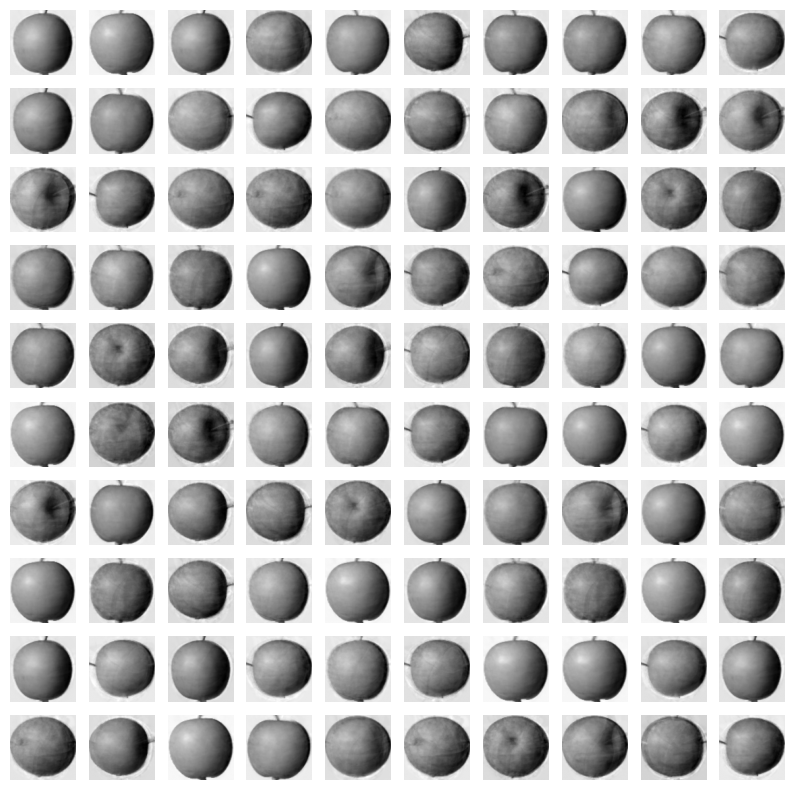

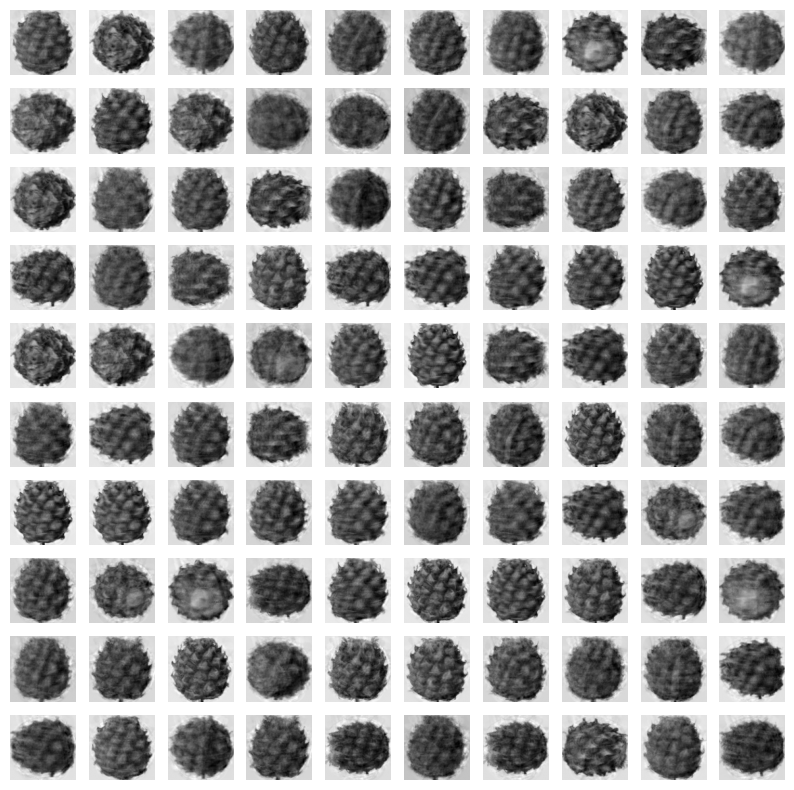

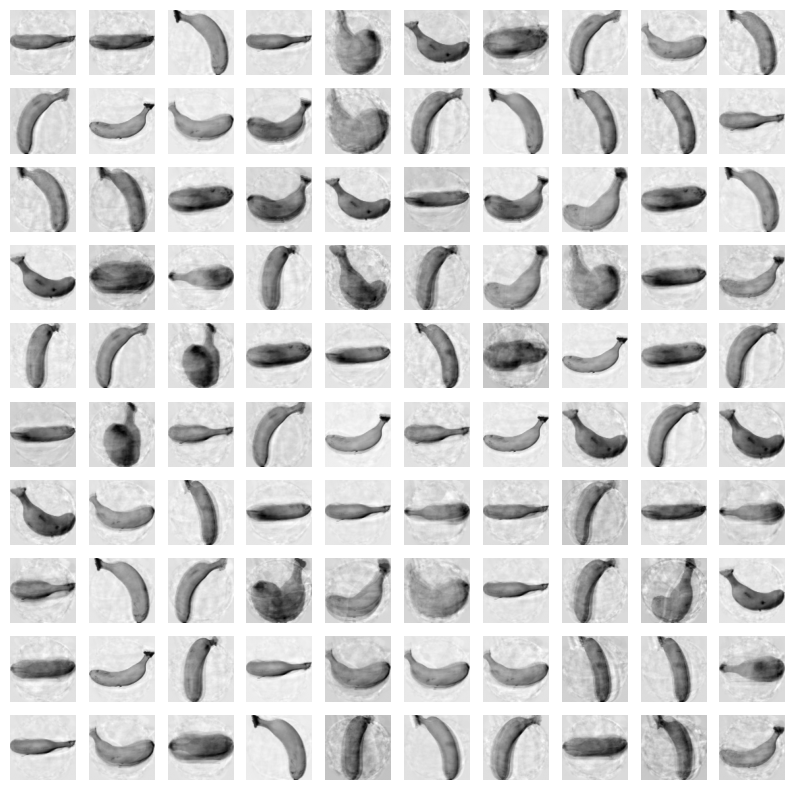

In [14]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print('\n')


In [ ]:
# ↑ 원본에서 차원축소 과정에서 데이터 손실이 있었기에 일부 흐리고 번진 부분이 있지만
# 대체로 잘 복원되었다!
# 불과 50개의 특성을 10,000개로 늘린 것을 감안한다면 놀라운 일
# 50개의 특성이 분산을 가장 잘 보존하도록 변환된 것이기 때문
# ↓ 50개의 특성은 과연 얼마나 분산을 보존하고 있는걸까?
"""
↑ 오오!, 대체로 거의 모든 과일이 잘 복원되었다!
원본에서 차원축소 과정에서 데이터 손실이 있었기에 일부 흐리고 번진 부분이 있다.

그러나, 불과 50개의 특성을 10,000개로 늘린 것을 감안한다면 놀라운 일이다!
50개의 특성이 분산을 가장 잘 보존하도록 변환된 것이기 때문이다.

만약 주성분을 '최대'로 사용했다면 완벽하게 원본 데이터를 재구성할수 있을 것이다.

'50개의 특성'은 얼마나 분산을 보존하고 있는 것일까?↓  다음에서 이를 알아보자
"""
None

# 설명된 분산  explained_variance_ratio_
explained variance



In [ ]:
# '설명된 분산' 이란
# => 원본데이터의 분산을 얼마나 잘 나타내는지 기록한 값
# PCA 클래스의 explained_variance_ratio_ 에 각 주성분의 '설명된 분산' 비율이 기록되어 있다

In [ ]:
# 당연히! '첫번째' 주성분의 설명된 분산이 가장 클 것이다.

In [15]:
pca.explained_variance_ratio_


array([0.42357017, 0.09941755, 0.06577863, 0.04031172, 0.03416875,
       0.03281329, 0.02573267, 0.02054963, 0.01372276, 0.01342773,
       0.01152146, 0.00944596, 0.00878232, 0.00846697, 0.00693049,
       0.00645189, 0.00578896, 0.00511203, 0.00486383, 0.00480348,
       0.00447837, 0.00437317, 0.0040804 , 0.00389472, 0.00372436,
       0.00359283, 0.00331458, 0.00317828, 0.00304338, 0.00303751,
       0.00288871, 0.00275863, 0.00264889, 0.00255918, 0.00252048,
       0.0024746 , 0.00239586, 0.00231011, 0.00222182, 0.00216971,
       0.00213934, 0.0019675 , 0.00192978, 0.00191038, 0.00185626,
       0.00181945, 0.0017221 , 0.00170187, 0.00163777, 0.00161839])

In [16]:
# [총 분산 비율]
# 위 분산비율을 모두 더하면 50개의 주성분으로 표현하고 있는 '총 분산 비율'을 얻을수 있다
np.sum(pca.explained_variance_ratio_)


np.float64(0.921628677093571)

## 적절한 주성분 개수 찾기

In [ ]:
# ↑ 92%가 넘는 분산을 유지하고 있다.

# 앞에서 50개의 특성에서 원본 데이터를 복원했을 때
# 원본 이미지의 품질이 높았던 이유가 이거다.

# '설명된 분산' 의 비율을 시각화 해보면
#  적절한 주성분 개수를 찾는데 도움이 된다.
# ↓

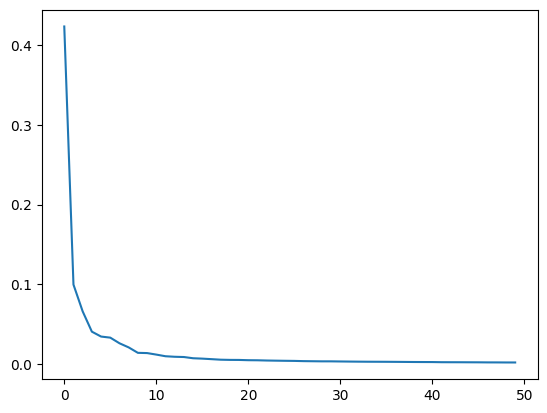

In [17]:
# '설명된 분산' 을 시각화 하기
plt.plot(pca.explained_variance_ratio_)
plt.show()


# 차원축소 결과 + 분류 알고리즘과 함께 사용
- 원본데이터를 사용했을때와 얼마나 차이가 있을까?


In [ ]:
# PCA로 차원축소된 데이터로 '지도학습 모델을 훈련' 해보자.


In [18]:
# 3개의 과일 사진을 분류해야 하므로 간단히 로지스틱 회귀 모델을 사용하겠습니다.
# 먼저 사이킷 런의 LogisticRegressoin 모델을 만듭니다
from sklearn.linear_model import LogisticRegression

In [19]:
lr = LogisticRegression()

In [20]:
# 타겟 값
# 0 : 사과, 1: 파인애플, 2: 바나나
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

# ↑ 100개의 0, 100개의 1, 100개의 2로 이루어진 타겟 데이터 생성

In [21]:
from sklearn.model_selection import cross_validate

In [22]:
# 먼저 '원본데이터'인 fruits_2d 를 사용해보자
# 로지스틱 회귀 모델에서 성능을 가능해보기 위해 cross_validate() 로 교차검증을 수행

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']), np.mean(scores['fit_time']))


0.9966666666666667 1.6992506504058837


In [23]:
# 차원 축소한 데이터 사용 : fruits_pca

scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']), np.mean(scores['fit_time']))


0.9966666666666667 0.016474103927612303


In [ ]:
"""
0.9966666666666667 1.6992506504058837j   <- 원본데이터 사용

0.9966666666666667 0.016474103927612303  <- 차원축소한 데이터 사용


"""
None

# 설명된 분산의 비율

In [24]:
# n_components= 에 '주성분의 개수' 대신  '원하는 설명된 분산의 비율' 을 입력할수도 있다
# PCA 는 지정된 비율에 도달할 때까지 자동으로 주성분을 찾는다.

# ↓ 설명된 분산의 50%에 달하는 주성분을 찾도록 PCA생성해보자
#   주성분 개수(int) 대신 0 ~ 1 사이의 비율을 실수(float)로 입력하면 됩니다.

pca = PCA(n_components=0.5)
pca.fit(fruits_2d)


PCA(n_components=0.5)

In [25]:
# 몇개의 주성분을 찾았는지 확인해보자
pca.n_components_

# ↓ 단 2개!  2개의 특성만으로도 원본데이터에 있는 분산의 50% 를 표현할수 있다!

np.int64(2)

In [26]:
# 위 모델로 원본데이터 변환해봅시다
fruits_pca = pca.transform(fruits_2d)

fruits_pca.shape  # (300, 2)

(300, 2)

In [27]:
# 2개의 특성으로 차원축소했는데, 교차검증의 결과는 어떨까요? 좋을까요?
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']), np.mean(scores['fit_time']))


0.99 0.0382598876953125


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 차원축소 결과 + 비지도 학습과 사용

In [28]:
from sklearn.cluster import KMeans

In [29]:
# 학습후 labels_ 확인
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
np.unique(km.labels_, return_counts=True)


(array([0, 1, 2], dtype=int32), array([110,  99,  91]))

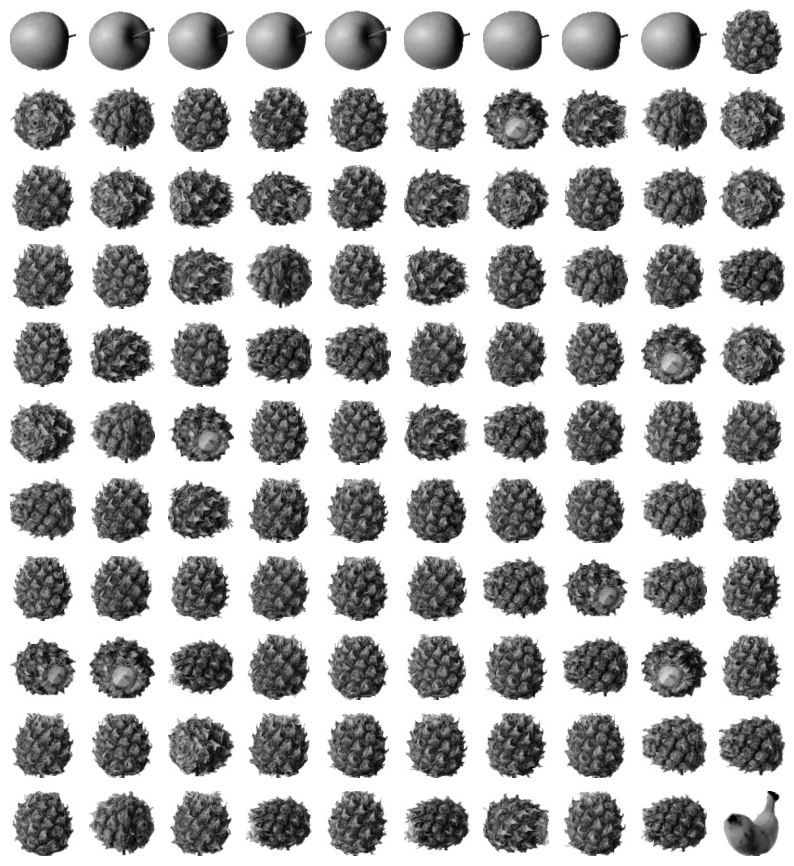

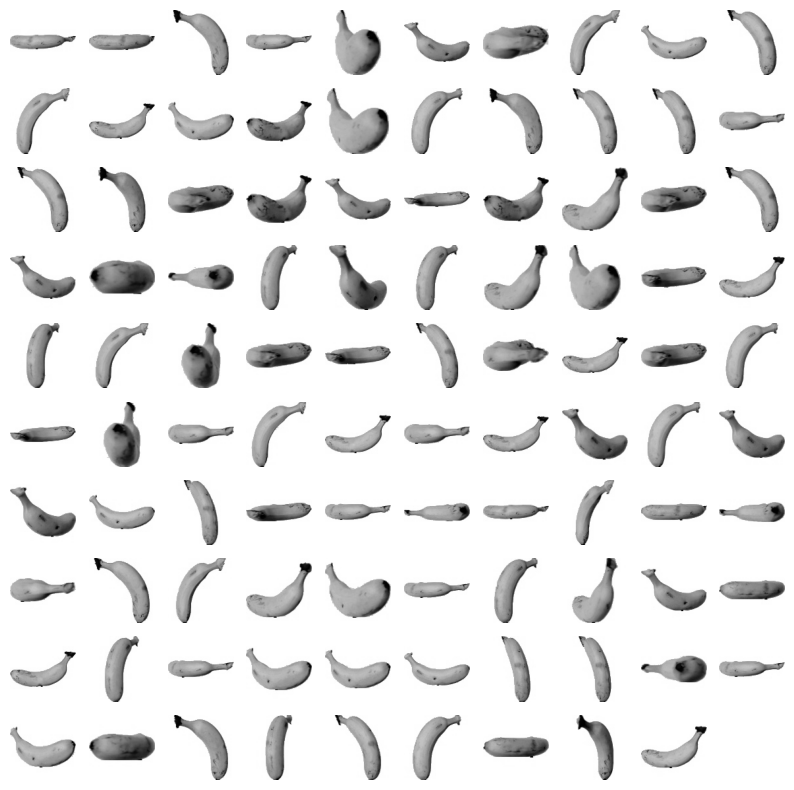

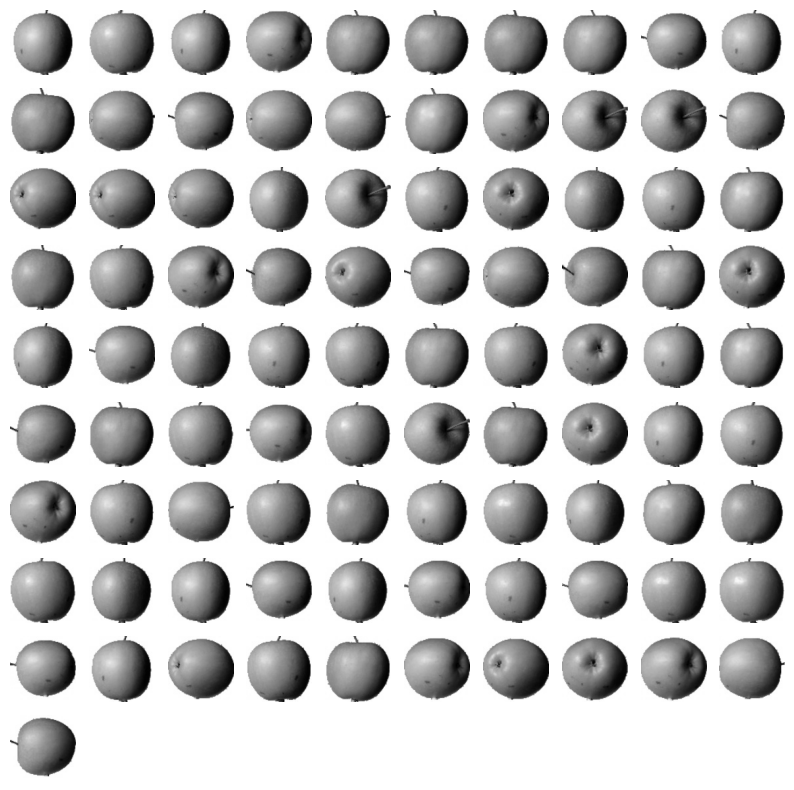

In [30]:
# KMeans 가 찾은 레이블을 사용해 과일 이미지를 출력
for label in range(0, 3):
  draw_fruits(fruits[km.labels_ == label])
  print('\n')

In [ ]:
# 차원축소한 데이터로 군집한 결과도 원본데이터로 했을때와 큰 차이가 없다!


In [ ]:
# 훈련데이터의 차원을 줄이면 또 하나 얻을 수 있는 장점! => 바로 시각화!
# 3개 이하로 차원을 줄이면 화면에 출력하기 쉽습니다.

# fruits_pca 는 2개의 특성 -> 2차원으로 표현 가능

# ↓ km.labels_ 를 사용해 클러스터 별로 나누어 scatter plot 을 그려보자


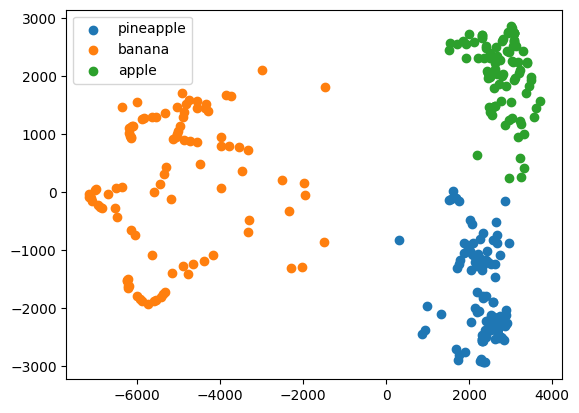

In [31]:
# fruits_pca 는 (300, 2) <- 두개 차원으로 축소
for label in range(0, 3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:, 0], data[:, 1])  # 두개 차원이므로 2차원 평면에 표현!

plt.legend(['pineapple', 'banana', 'apple'])    # ※ 각자 생성된 label 순서대로 입력하세요
plt.show()

# 문제 해결 과정 : 주성분 분석으로 차원 축소

1. 차원축소는 대표적인 비지도 학습 문제
  1. 차원축소를 사용하면 데이터셋의 크기 줄일수 있고, 시각화도 비교적 쉬워진다
  1. 차원축소된 데이터를 지도학습 혹은 비지도 학습 알고리즘에 재사용하여 성능을 높이거나 훈련속도를 향상 시킬수 있다

1. PCA 를 사용해 과일 사진 데이터의 특성을 50개로 줄임
  1. 특성 개수는 작아졌지만, 변환된 데이터는 원본데이터에 있는 분산의 90% 이상을 표현한다
  1. 이를 '설명된 분산' 이라 한다

1. PCA 는 자동으로 '설명된 분산' 을 계산하여 제공한다.
  1. 또한 주성분의 개수를 명시적으로 지정하는 대신 '설명된 분산' 의 비율을 설정하여 원하는 비율만큼 주성분을 찾을 수 있다.

1. PCA 는 변환된 데이터에서 원본데이터를 복원하는 메소드도 제공.  
  1. 변환된 데이터가 원본 데이터의 분산을 모두 유지하고 있지 않다면 완벽하게 복원되진 않는다.
  1. 하지만! 적은 특성으로도 상당 부분의 디테일을 복원할 수 있다.    